In [46]:
import numpy as np
import os
import skimage.io as io
from matplotlib import pyplot as plt
from PIL import Image
from mpl_toolkits.mplot3d import Axes3D
import cv2
import skimage.io as io
from copy import deepcopy
import time

In [35]:
img_files_path = [_ for _ in os.listdir(r'\\fatherserverdw\Kevin\imageregistration\registered_images') if _.endswith(".png")]
img_files_path_complete = [os.path.join(r'\\fatherserverdw\Kevin\imageregistration\registered_images', x) for x in img_files_path]

In [42]:
#downsize all images by factor of 100 (already done):

# ex_img = Image.open(img_files_path_complete[0])
# scale_percent = 1
# width = int(ex_img.size[1] * scale_percent / 100)
# height = int(ex_img.size[0] * scale_percent / 100)
# dim = (width, height)
# for idx in range(len(img_files_path_complete)):
#     img = Image.open(img_files_path_complete[idx])
#     img_ra = np.array(img)
#     resize_img = cv2.resize(img_ra,dim,interpolation = cv2.INTER_AREA)
#     resize_img = cv2.cvtColor(resize_img, cv2.COLOR_BGR2RGB)
#     dstpth = os.path.join(r'\\fatherserverdw\Kevin\imageregistration\registered_images\downsized',img_files_path[idx])
#     cv2.imwrite(dstpth,resize_img)

In [43]:
resize_img_files_path = [_ for _ in os.listdir(r'\\fatherserverdw\Kevin\imageregistration\registered_images\downsized') if _.endswith(".png")]
resize_img_files_path_complete = [os.path.join(r'\\fatherserverdw\Kevin\imageregistration\registered_images\downsized', x) for x in img_files_path]

In [51]:
im_3d[:,:,:,1] >230

array([[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],

       [[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True, False, ...,  True,  True,  True],
        [ True,  True, False, ...,  True,  True,  True],
        [False,  True, False, ...,  True,  True,  True]],

       [[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True, False, False, ...,  True,  True,  True],
        [ True, False, False, ...,  True,  Tr

In [55]:
color.shape

(53, 63, 3)

In [62]:
colors

array([[[[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [0.96078431, 0.94117647, 0.9372549 ],
         [0.96078431, 0.94117647, 0.94117647],
         [0.98823529, 0.98039216, 0.97647059]],

        ...,

        [[0.9372549 , 0.90980392, 0.90588235],
         [0.94117647, 0.91372549, 0.90980392]

time it took to register: 13.863956212997437 seconds


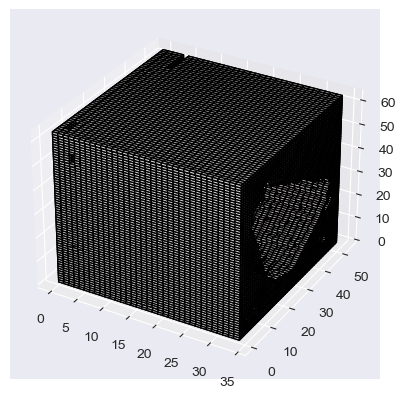

In [60]:
im_list = io.imread_collection(resize_img_files_path_complete)
im_3d = im_list.concatenate()
im_3d.shape
# im_3d_new = im_3d.transpose(1,2,0,3)

imlist = im_3d
binaries = []
colors = []

start = time.time()

for im in imlist:
    binary = im[:,:,1]>230
    binaries.append(binary)
    color = deepcopy(im)
    color[~binary] = [0,0,0]
    color = color/255
    color = color.astype(np.object)
    colors.append(color)
binaries = np.array(binaries)
colors = np.array(colors)

ax = plt.figure().add_subplot(projection='3d')
ax.voxels(binaries, facecolors=colors, edgecolor='k')

end = time.time()
print("time it took to register: "+  str(end-start) + " seconds")

plt.show()

In [ ]:
# plot one image first:

In [ ]:
# start = time.time()
#
#
# imlist = []
# binaries = []
# colors = []
# for im in imlist:
#     binary = im[:,:,1]>230
#     binaries.append(binary)
#     color = deepcopy(im)
#     color[~binary] = [0,0,0]
#     color = color.astype(np.object)
#     colors.append(color)
# binaries = np.array(binaries)
# colors = np.array(colors)
#
# ax = plt.figure().add_subplot(projection='3d')
# ax.voxels(binaries, facecolors=colors, edgecolor='k')
#
#
# end = time.time()
# print("time it took to register: "+  str(end-start) + " seconds")

C:\Users\choke\AppData\Local\Temp\ipykernel_21428\3843495126.py:7: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


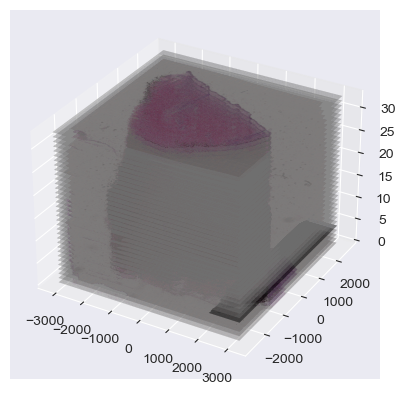

time it took to register: 728.4389760494232 seconds


In [40]:

# start = time.time()
#
# X, Y= np.mgrid[-3164:3164:1, -2676:2676:1]
# fig = plt.figure()
# ax = fig.gca(projection='3d')
# for i in np.linspace(0,33, num=34):
#     Z = np.zeros(X.shape)+i
#     idx = int(i)
#     ig = Image.open(img_files_path_complete[idx])
#     ig = np.array(ig).astype(np.float32)
#     ig = ig / 255
#     T = ig
#     final_fig = ax.plot_surface(X, Y, Z, facecolors=T, linewidth=0, alpha = 0.5, cstride
#         = 10, rstride = 10)
# plt.show()
#
# end = time.time()
# print("time it took to register: "+  str(end-start) + " seconds")
# #save finalfig

In [47]:
# from mayavi import mlab
# from mayavi.mlab import surf
# start = time.time()
#
# X, Y = np.mgrid[-3164:3164:1, -2676:2676:1]
#
# for i in np.linspace(0,33, num=34):
#     Z = np.zeros(X.shape)+i
#     idx = int(i)
#     ig = Image.open(img_files_path_complete[idx])
#     ig = np.array(ig).astype(np.float32)
#     ig = ig / 255
#     ig = tuple(map(tuple, ig))
#     clr = ig
# surf(X,Y,Z,color = clr,warp_scale = "auto")
# mlab.show()
#
# end = time.time()
# print("time it took to register: "+  str(end-start) + " seconds")